In [22]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset, get_project_path, gasp as GASP

In [4]:
path = get_project_path()
M = dataset.load_dataset9a(path)
M.shape

Downloading...
From: https://drive.google.com/uc?id=10ZRAlIO9w5Q3EsJLHXpnIwU14HM9n12L
To: c:\Users\mmend\projects\mri\GASP\data\20231222_GASP_PHANTOM.zip
100%|██████████| 1.27G/1.27G [02:41<00:00, 7.85MB/s]


Download complete.
Extracting files ...
Extract complete.
Data located at: $../..\gasp\../data\20231222_GASP_PHANTOM
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\dixon\
Loading files: ['meas_MID210_gre_TE3p41_FID58122.dat', 'meas_MID211_gre_TE4p55_FID58123.dat', 'meas_MID212_gre_TE5p68_FID58124.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

read data:   0%|          | 0/128 [00:00<?, ?it/s]

(128, 128, 8, 3)

In [5]:
M0 = M[:,:,:,0]
M1 = M[:,:,:,1]
M2 = M[:,:,:,2]

field_map = np.angle(np.conjugate(M0) * M2)
f = np.exp(-1j * field_map / 2)
Mw = M0 + M1
Mf = M0 - M1
Mw3 = M0 + M1 * np.exp(-1j * field_map / 2)
Mf3 = M0 - M1 * np.exp(-1j * field_map / 2)

Mw = np.sqrt(np.sum(np.abs(Mw)**2, axis=2))
Mf = np.sqrt(np.sum(np.abs(Mf)**2, axis=2))
Mw3 = np.sqrt(np.sum(np.abs(Mw3)**2, axis=2))
Mf3 = np.sqrt(np.sum(np.abs(Mf3)**2, axis=2))

[]

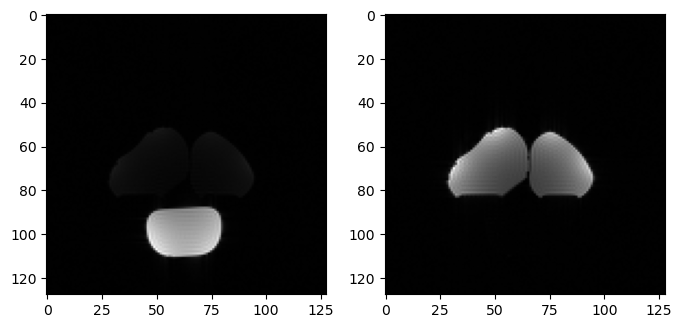

In [6]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2, 2, 1)
ax2 = f.add_subplot(2, 2, 2)
ax.imshow(np.abs(Mw3), cmap='gray')
ax2.imshow(np.abs(Mf3), cmap='gray')
plt.plot()

In [29]:
M_phantom20 = dataset.load_dataset9b(path)
M.shape

Data: 20231222_GASP_PHANTOM data exists
Path: ../..\gasp\../data\20231222_GASP_PHANTOM\gasp_fa20\
Loading files: ['meas_MID219_bSSFP_gasp_knee_fa20_1x1x2_2D_TR6ms_FID58131.dat', 'meas_MID220_bSSFP_gasp_knee_fa20_1x1x2_2D_TR12ms_FID58132.dat', 'meas_MID221_bSSFP_gasp_knee_fa20_1x1x2_2D_TR24ms_FID58133.dat']
pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/133M [00:00<?, ?B/s]

read data:   0%|          | 0/4095 [00:00<?, ?it/s]

(256, 256, 8, 16, 3)

In [55]:
def train(bw, shift):
    width = 256
    height = 1
    npcs = 16
    TRs = [5e-3, 10e-3, 20e-3]
    alpha = np.deg2rad(60)
    gradient = 2 * np.pi
    phantom_type = 'line'
    
    D = responses.gaussian(width, bw=bw, shift=shift)
    M = simulation.simulate_ssfp(width=width, height=height, npcs=npcs, TRs=TRs, alpha=alpha, gradient=gradient, phantom_type=phantom_type)
    Ic, An = simulation.train_gasp(M, D, clines=2)
    An = np.array(An)[0]
    print(An.shape)
    return Ic, An, M

Ic, An, Mtrain = train(bw=0.2, shift=-0)

(48,)


(1, 256)
(1, 256)


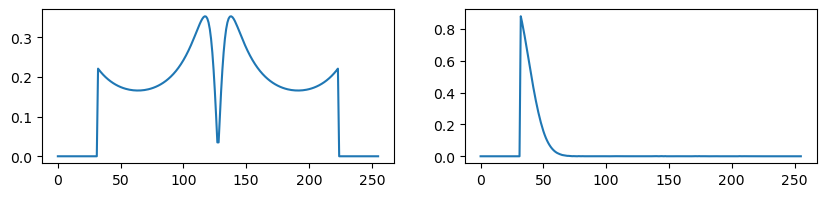

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2))

_ = np.sqrt(np.sum(np.abs(Mtrain)**2, axis=2))
_ = abs(_[:,:,0,0])
print(_.shape)
ax1.plot(_.T)

_ = np.abs(Ic)
print(_.shape)
ax2.plot(_.T)

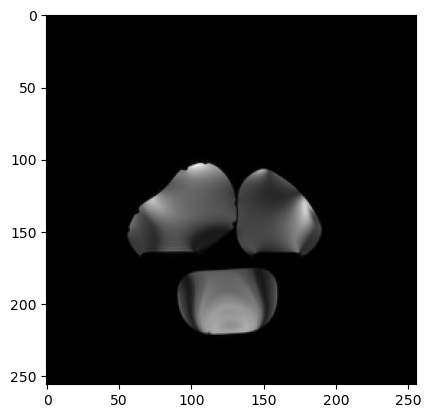

In [57]:
def run_gasp(Mdata, A):
    Ic = []
    for cc in range(Mdata.shape[2]):
        Mc = M[:,:,cc,:,:]
        Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[0], -1))
        _ = GASP.apply_gasp(Mc, An)
        Ic.append(_)
    Ic = np.array(Ic)
    Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
    return Ic

output = run_gasp(M_phantom20, An)
plt.imshow(output, cmap='gray')

(256, 256)